In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Thermostat.csv")
df.head()

,ts,date,time,current_temperature,thermostat_status,label,type
0,1556207942,25-Apr-19,8:59:02,30.577325,1,1,injection
1,1556207946,25-Apr-19,8:59:06,29.187912,1,1,injection
2,1556207946,25-Apr-19,8:59:06,30.208893,1,1,injection
3,1556207946,25-Apr-19,8:59:06,27.731392,1,1,injection
4,1556207946,25-Apr-19,8:59:06,26.211462,1,1,injection


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                     count  percentage
ts                       0         0.0
date                     0         0.0
time                     0         0.0
current_temperature      0         0.0
thermostat_status        0         0.0
label                    0         0.0
type                     0         0.0


In [ ]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

True
               ts       date      time  current_temperature  \
598    1556205403  25-Apr-19   8:16:43                 25.0   
5950   1556205630  25-Apr-19   8:20:30                 25.0   
6298   1554061414  31-Mar-19  12:43:34                 25.0   
6300   1554061414  31-Mar-19  12:43:34                 25.0   
6317   1554061414  31-Mar-19  12:43:34                 25.0   
...           ...        ...       ...                  ...   
51156  1554061489  31-Mar-19  12:44:49                 25.0   
51160  1554061489  31-Mar-19  12:44:49                 25.0   
51184  1554061489  31-Mar-19  12:44:49                 25.0   
51224  1554061490  31-Mar-19  12:44:50                 25.0   
51234  1554061490  31-Mar-19  12:44:50                 25.0   

       thermostat_status  label       type  
598                    0      1  injection  
5950                   0      1  injection  
6298                   0      0     normal  
6300                   0      0     normal  
6317         

In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time  current_temperature  \
0      1556207942 2019-04-25     8:59:02            30.577325   
1      1556207946 2019-04-25     8:59:06            29.187912   
2      1556207946 2019-04-25     8:59:06            30.208893   
3      1556207946 2019-04-25     8:59:06            27.731392   
4      1556207946 2019-04-25     8:59:06            26.211462   
...           ...        ...         ...                  ...   
52769  1554158155 2019-04-01   15:35:55             26.571629   
52770  1554158158 2019-04-01   15:35:58             26.473615   
52771  1554158160 2019-04-01   15:36:00             26.551514   
52772  1554158160 2019-04-01   15:36:00             26.517323   
52773  1554158162 2019-04-01   15:36:02             28.314374   

       thermostat_status  label       type  
0                      1      1  injection  
1                      1      1  injection  
2                      1      1  injection  
3                      1      1  inject

In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df.month.unique()

array([4, 3])

In [ ]:
df.hour.unique()

array([ 8,  9,  7, 10, 17, 18, 22, 12, 19, 20, 13, 14, 15, 16,  3,  4,  5,
       23,  0])

In [ ]:
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
df

,ts,date,time,current_temperature,thermostat_status,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556207942,2019-04-25,8:59:02,30.577325,1,1,injection,2019,4,Thursday,8,59,02,0.965926,-0.258819,1.0,6.123234e-17
1,1556207946,2019-04-25,8:59:06,29.187912,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
2,1556207946,2019-04-25,8:59:06,30.208893,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
3,1556207946,2019-04-25,8:59:06,27.731392,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
4,1556207946,2019-04-25,8:59:06,26.211462,1,1,injection,2019,4,Thursday,8,59,06,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52769,1554158155,2019-04-01,15:35:55,26.571629,1,0,normal,2019,4,Monday,15,35,55,-0.500000,-0.866025,1.0,6.123234e-17
52770,1554158158,2019-04-01,15:35:58,26.473615,1,0,normal,2019,4,Monday,15,35,58,-0.500000,-0.866025,1.0,6.123234e-17
52771,1554158160,2019-04-01,15:36:00,26.551514,1,0,normal,2019,4,Monday,15,36,00,-0.500000,-0.866025,1.0,6.123234e-17
52772,1554158160,2019-04-01,15:36:00,26.517323,1,0,normal,2019,4,Monday,15,36,00,-0.500000,-0.866025,1.0,6.123234e-17


In [ ]:
# drop columns
df = df.drop(['ts', 'time','type','date','min','sec'], axis=1)

In [ ]:
df

,current_temperature,thermostat_status,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17


In [ ]:
# transform hour to int
df['hour'] = df['hour'].astype(int)

In [ ]:
type('hour')

str

In [ ]:
# transform int to string
df['label'] = df['label'].astype(str)

In [ ]:
df['thermostat_status'] = df['thermostat_status'].astype(str)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['current_temperature',
 'year',
 'month',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
cat_list

['thermostat_status', 'day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

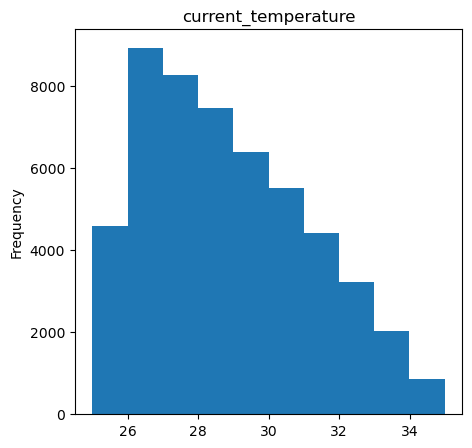

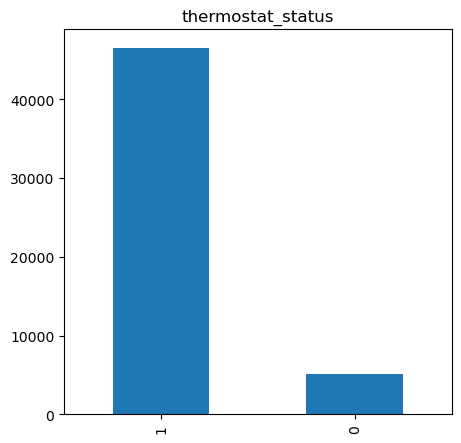

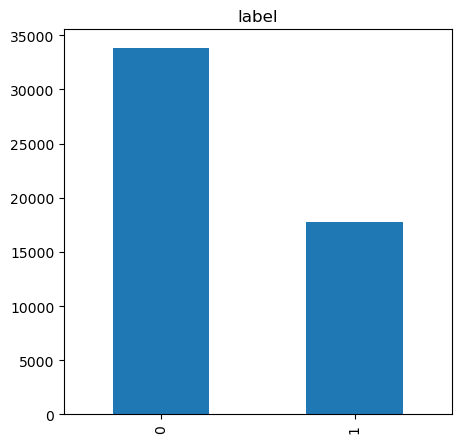

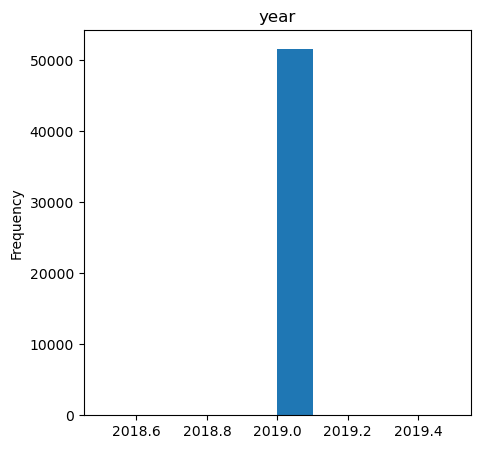

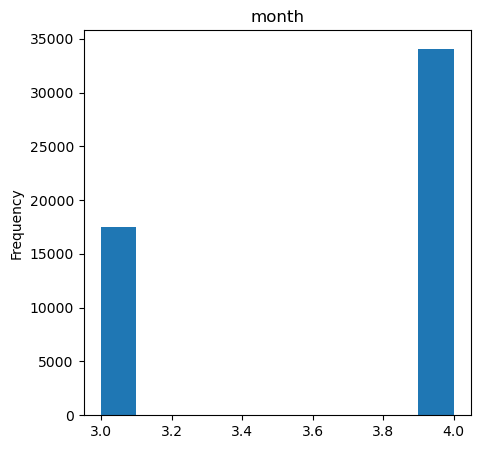

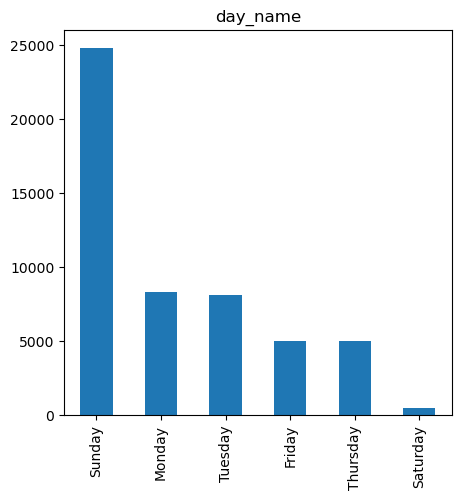

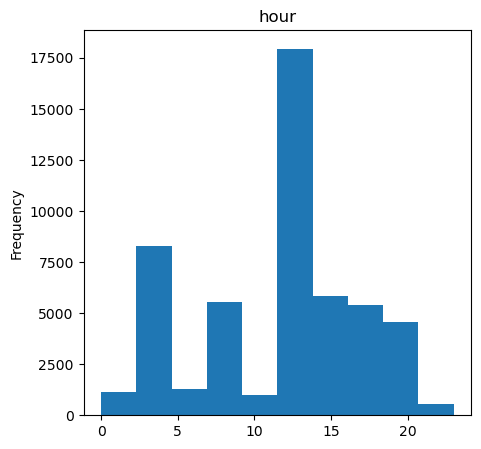

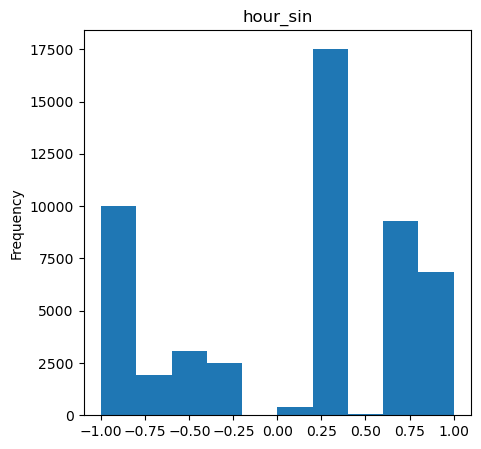

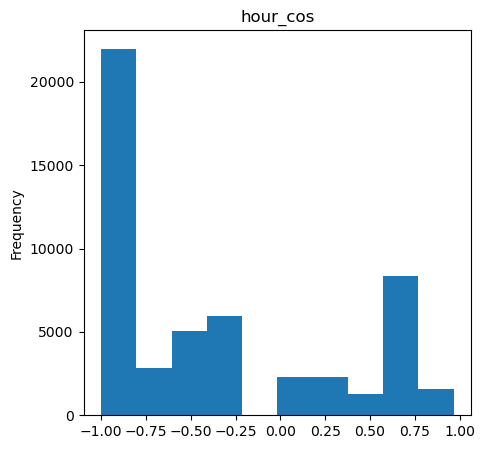

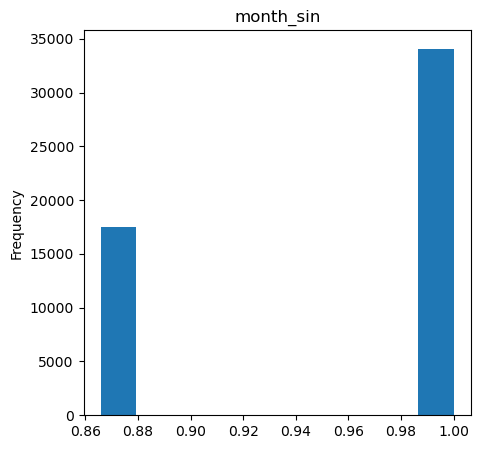

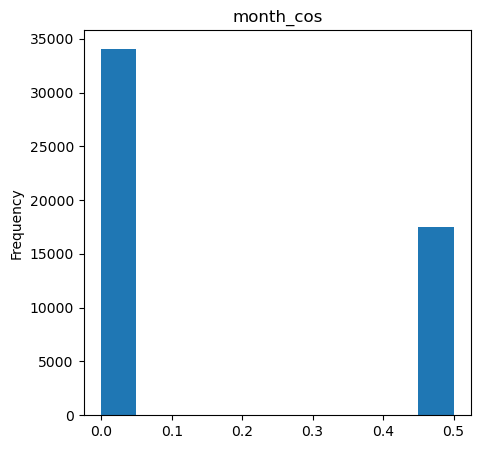

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

,current_temperature,thermostat_status,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,1,1,2019,4,Thursday,8,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,1,0,2019,4,Monday,15,-0.500000,-0.866025,1.0,6.123234e-17


In [ ]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name','thermostat_status'],return_df=True)

In [ ]:
df=encoder.fit_transform(df)

In [ ]:
df

,current_temperature,thermostat_status_0,thermostat_status_1,label,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,30.577325,0,1,1,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
1,29.187912,0,1,1,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
2,30.208893,0,1,1,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
3,27.731392,0,1,1,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
4,26.211462,0,1,1,2019,4,0,0,1,8,0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52769,26.571629,0,1,0,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17
52770,26.473615,0,1,0,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17
52771,26.551514,0,1,0,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17
52772,26.517323,0,1,0,2019,4,0,1,1,15,-0.500000,-0.866025,1.0,6.123234e-17


<AxesSubplot:>

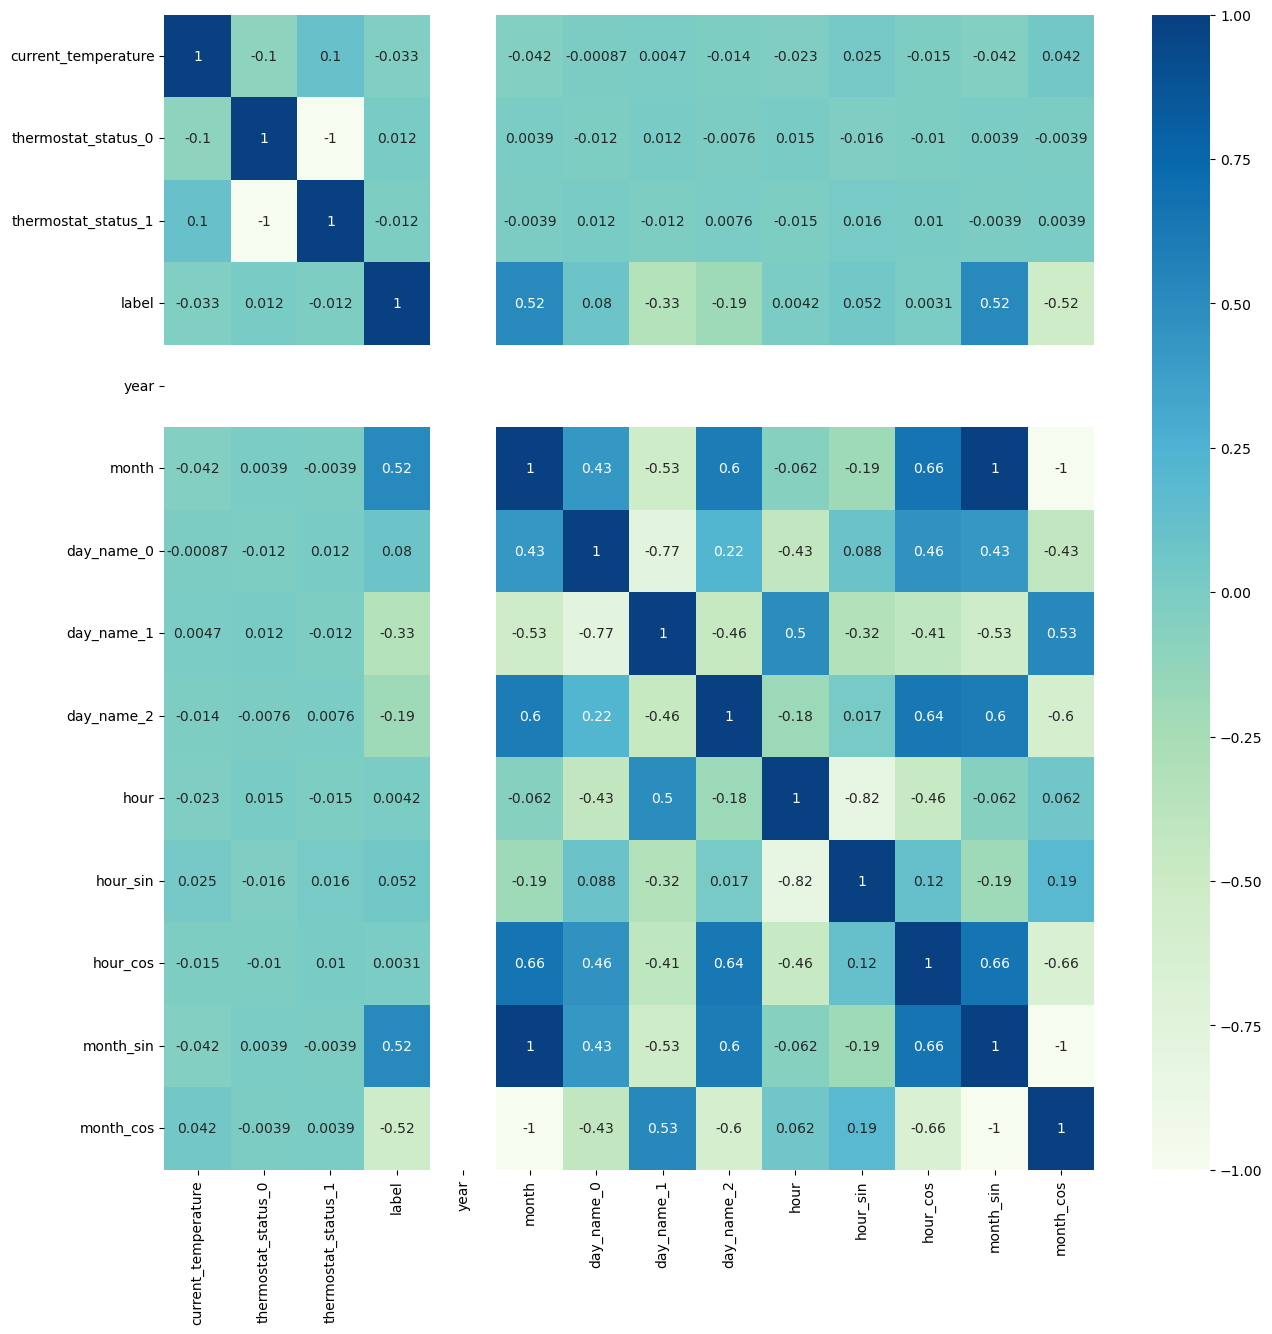

In [ ]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [ ]:
list(df.columns)

['current_temperature',
 'thermostat_status_0',
 'thermostat_status_1',
 'label',
 'year',
 'month',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
# select and rearrange columns
df = df[['current_temperature',
 'thermostat_status_0',
 'thermostat_status_1',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','label']]

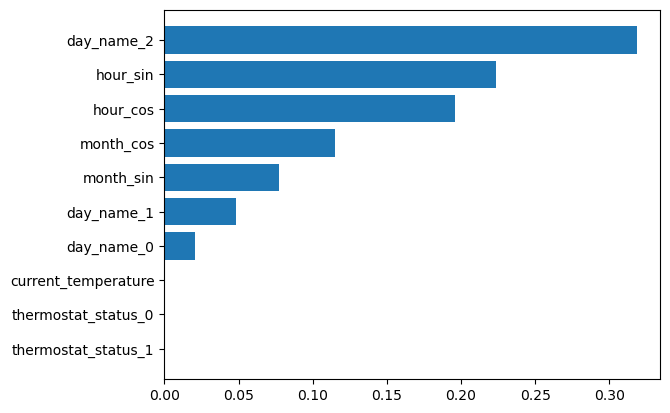

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10157
           1       1.00      0.99      1.00      5329

    accuracy                           1.00     15486
   macro avg       1.00      1.00      1.00     15486
weighted avg       1.00      1.00      1.00     15486

